In [0]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

In [0]:
data=pd.read_csv('fer2013.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
y = data.emotion.values
y = utils.to_categorical(y)

*PREPROCESSING*

In [0]:
def process (data,size):
    x=[]
    for i in range(0,len(data)):
        image=data[i].split(' ')
        image=np.array(image).astype(float)
        image=image/255
        image= image.reshape(size)
        x.append(image)
    return x

In [0]:
X=process(data.pixels,(48,48))

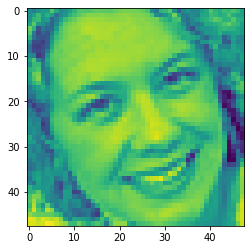

In [7]:
plt.imshow(X[8774])

In [0]:
X=np.expand_dims(X,3)

In [9]:
X.shape[1:]

(48, 48, 1)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

*MODEL BUILDING*

In [11]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(5,5), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(Conv2D(64,(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same',activation='relu'))
model.add(Conv2D(128,(5,5), padding='same',activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(256,(3,3), padding='same',activation='relu'))
model.add(Conv2D(256,(5,5), padding='same',activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Dense(7, activation='softmax'))

opt = Adam(lr=1e-3)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       4

In [12]:
model.fit(x=x_train,y=y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
505/505 [==============================] - 13s 26ms/step - loss: 1.8415 - accuracy: 0.3051 - val_loss: 1.6752 - val_accuracy: 0.3310
Epoch 2/20
505/505 [==============================] - 12s 24ms/step - loss: 1.4996 - accuracy: 0.4251 - val_loss: 1.3429 - val_accuracy: 0.4804
Epoch 3/20
505/505 [==============================] - 12s 24ms/step - loss: 1.2860 - accuracy: 0.5098 - val_loss: 1.3298 - val_accuracy: 0.4915
Epoch 4/20
505/505 [==============================] - 12s 24ms/step - loss: 1.1729 - accuracy: 0.5567 - val_loss: 1.1954 - val_accuracy: 0.5364
Epoch 5/20
505/505 [==============================] - 12s 24ms/step - loss: 1.0889 - accuracy: 0.5899 - val_loss: 1.2423 - val_accuracy: 0.5534
Epoch 6/20
505/505 [==============================] - 12s 24ms/step - loss: 1.0162 - accuracy: 0.6199 - val_loss: 1.0695 - val_accuracy: 0.5996
Epoch 7/20
505/505 [==============================] - 12s 24ms/step - loss: 0.9603 - accuracy: 0.6434 - val_loss: 1.1222 - val_accuracy:

In [0]:
losses=pd.DataFrame(model.history.history)

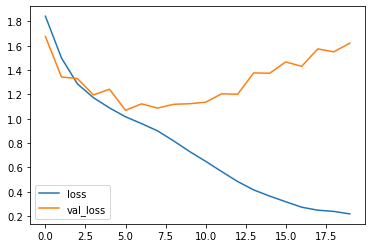

In [14]:
losses[['loss','val_loss']].plot()

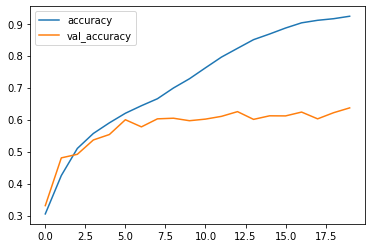

In [15]:
losses[['accuracy','val_accuracy']].plot()

In [0]:
true_y=np.argmax(y_test,axis=1)

In [17]:
pred_y=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


*EVALUVATION*

In [18]:
con=confusion_matrix(true_y,pred_y)
print(con)

[[189   1  40  51 113  11  85]
 [  8  30   3   4   4   2   2]
 [ 41   2 218  36 109  40  41]
 [ 21   1  13 776  48  11  27]
 [ 41   0  72  43 352   8 104]
 [ 13   0  28  16  17 333  17]
 [ 24   1  36  66 100   4 387]]


In [19]:
accuracy_score(true_y,pred_y)

0.636667595430482

In [20]:
print(classification_report(true_y,pred_y))

              precision    recall  f1-score   support

           0       0.56      0.39      0.46       490
           1       0.86      0.57      0.68        53
           2       0.53      0.45      0.49       487
           3       0.78      0.87      0.82       897
           4       0.47      0.57      0.52       620
           5       0.81      0.79      0.80       424
           6       0.58      0.63      0.60       618

    accuracy                           0.64      3589
   macro avg       0.66      0.61      0.62      3589
weighted avg       0.64      0.64      0.63      3589



In [0]:
model.save('emotion.h5')